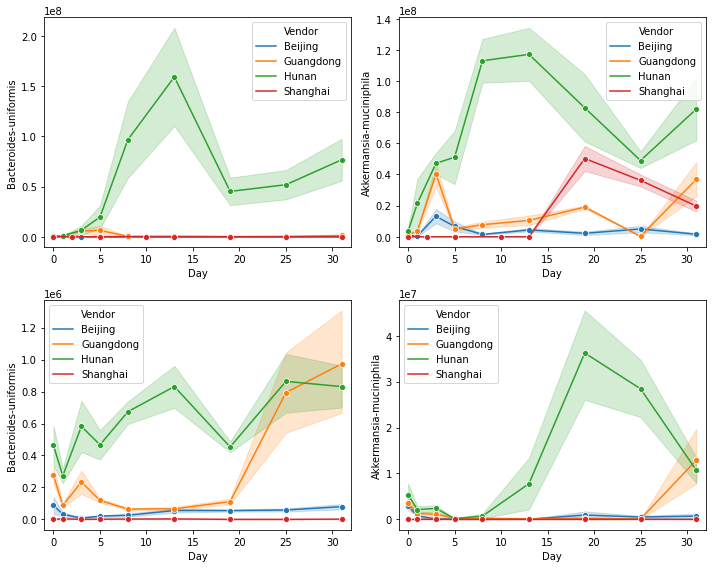

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

species2plot = ['Bacteroides-uniformis','Akkermansia-muciniphila']
fig, ax = plt.subplots(figsize=(10,8), nrows=2, ncols=len(species2plot))

df_meta = pd.read_csv('../../our_data/meta_data.csv', index_col=0)
df_bac = pd.read_csv('../../our_data/16S_absolute_abundance_species.csv', index_col=0)
df_meta_bac = pd.merge(df_meta, df_bac, left_index=True, right_index=True, how='inner')

for k1,diet in enumerate(['Inulin','Resistant starch']):
    df_tmp = df_meta_bac[df_meta_bac.Diet==diet]
    for k2,sp in enumerate(species2plot):
        sns.lineplot(x='Day',y=sp, marker='o', hue='Vendor', ci=68, data=df_tmp, ax=ax[k1,k2])
        ax[k1,k2].set_xlim([-1,32])

plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("absolute_abundance_amuc_buni.svg", format="svg")

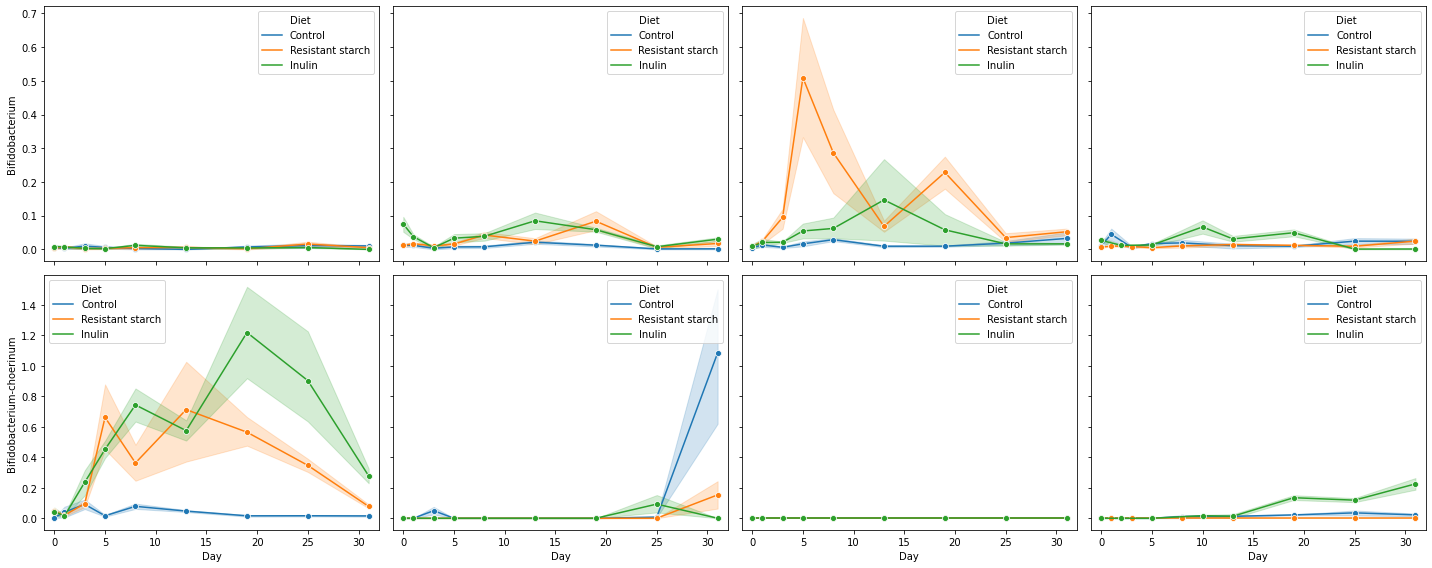

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

species2plot = ['Bifidobacterium','Bifidobacterium-choerinum']
fig, ax = plt.subplots(figsize=(20,8), nrows=2, ncols=4, sharex=True, sharey='row')

df_meta = pd.read_csv('../../our_data/meta_data.csv', index_col=0)
df_bac = pd.read_csv('../../our_data/16S_relative_abundance_species.csv', index_col=0)*100
df_meta_bac = pd.merge(df_meta, df_bac, left_index=True, right_index=True, how='inner')

for k1,vendor in enumerate(['Beijing','Guangdong','Hunan','Shanghai']):
    for k2,sp in enumerate(species2plot):
        sns.lineplot(x='Day',y=sp, marker='o', hue='Diet', ci=68, data=df_meta_bac[df_meta_bac.Vendor==vendor], ax=ax[k2,k1])
        ax[k2,k1].set_xlim([-1,32])

plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("absolute_abundance_bifido.svg", format="svg")